In [1]:
using Plots
using LinearAlgebra

### Su-Schrieffer-Heeger (SSH) Model

### $\mathcal{H}=v \sum_{i}\left(a_{i}^{\dagger} b_{i}+\text { h.c. }\right)+w \sum_{i}\left(b_{i}^{\dagger} a_{i+1}+\text { h.c. }\right)$

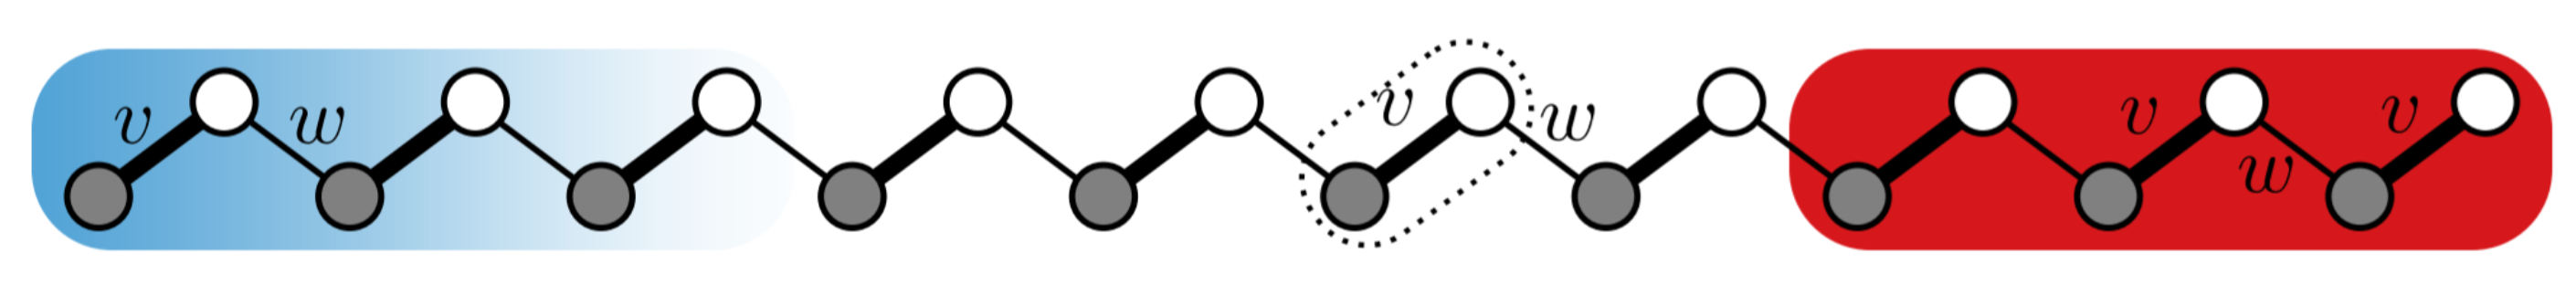

### $\begin{array}{l}
\tilde{\mathcal{H}}=\vec{d} \cdot \vec{\sigma}\\
d_{x}(k)=v+w \cos(k) \quad d_{y}(k)= w \sin (k) \quad d_{z}=0
\end{array}$

### $\begin{array}{c}
d=\pm \sqrt{d_{x}^{2}+d_{y}^{2}}
=\pm \sqrt{v^{2}++2 v w \cos k+w^{2}}
    \end{array}$

In [19]:
sigma_x = [0 1;1 0]
sigma_y = [0 -im;im 0]
sigma_z = [1 0;0 -1]

dx(k::Float64,v=1,w=2) = v + w*cos(k)
dy(k::Float64,v=1,w=2) = w*sin(k);

d(k::Float64,v=1,w=2) = sqrt(dx(k,v,w)^2+dy(k,v,w)^2);
H(k::Float64,v=1,w=2) = dx(k,v,w)*sigma_x + dy(k,v,w)*sigma_y; # Hamiltonian

l = 2*314
ks=range(-2*pi,stop=2*pi,length=l)
dk=ks[2]-ks[1];

### Check the Hamiltonian Properties

### 1) $\sigma_{z} h_{k} \sigma_{z}=-h_{k}$

In [20]:
k_test=rand()
sigma_z*H(k_test)*sigma_z + H(k_test) # Should equal to zero

2×2 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

### 2) $\sigma_{y} h_{k}^{*} \sigma_{y}=-h_{k}$

In [21]:
sigma_y*conj(H(k_test))*sigma_y + H(k_test) # Should equal to zero

2×2 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

### 3) $\sigma_{x} h_{k} \sigma_{x}= h_{-k}$

In [22]:
sigma_x*H(k_test)*sigma_x - H(-k_test) # Should equal to zero

2×2 Matrix{ComplexF64}:
 0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im

### Dispersion relation 
### $E(k)=\pm\left|v+e^{-i k} w\right|=\pm \sqrt{v^{2}+w^{2}+2 v w \cos k}$

In [23]:
# Parameters chosen to look at
va = [1.0, 0.5,1.0,  0.0,0.5,  0.4,0.6]
da = [0.0, 0.5,-0.5, 0.5,-0.5, 0.2,-0.2] # delta = v - w

# w values corresponding to chosen ds
wa=round.(va+da;sigdigits=2)
logocolors = Colors.JULIA_LOGO_COLORS

# plot chosen parameters
colors=[colorant"skyblue2",
    colorant"olivedrab",colorant"slateblue4",
    colorant"violetred3",colorant"yellow2",
    colorant"maroon",colorant"sienna2",
    ]
styles=[:solid,
    :dash,:dash,
    :solid,:solid,
    :dot,:dot]
widths=[10,15,5,15,5,10,3];

### Band diagrams for different parameters

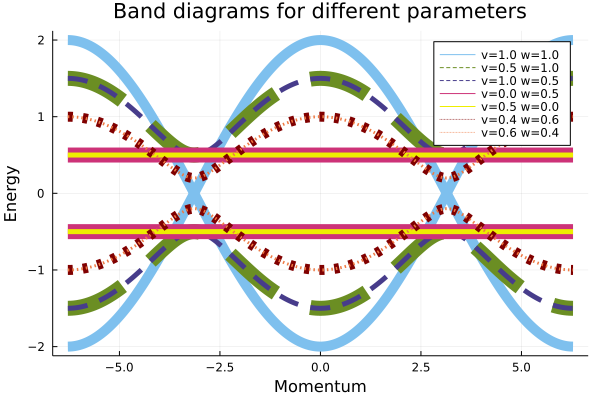

In [24]:
plot()
for ii in 1:length(va)
    plot!(ks,d.(ks,va[ii],wa[ii])
        ,label="v=$(va[ii]) w=$(wa[ii])"
        ,linewidth=widths[ii],color=colors[ii],linestyle=styles[ii])
    
    plot!(ks,-d.(ks,va[ii],wa[ii])
        ,label=""
        ,linewidth=widths[ii],color=colors[ii],linestyle=styles[ii])
end
plot!(title="Band diagrams for different parameters",
xlabel="Momentum",ylabel="Energy")

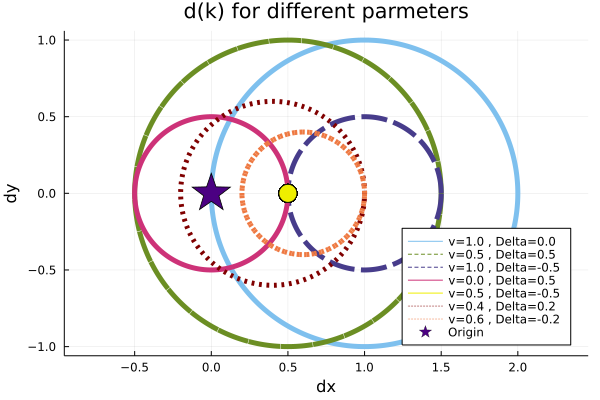

In [8]:
# Delta = v - w
plot()
for ii in 1:length(va)
    plot!(dx.(ks,va[ii],wa[ii]),
        dy.(ks,va[ii],wa[ii])
    ,label="v=$(va[ii]) , Delta=$(da[ii])"
    ,linewidth=5,color=colors[ii],linestyle=styles[ii])
end

statval=5
scatter!(dx.(ks,va[statval],wa[statval]),dy.(ks,va[statval],wa[statval])
    ,label="",markersize=10,color=colors[statval])

scatter!([0],[0],label="Origin",
        markersize=20,markershape=:star5,color=colorant"indigo")

plot!(title="d(k) for different parmeters",
xlabel="dx", ylabel="dy",legend=:bottomright,aspect_ratio=1)

### Plotting the Phase

In [25]:
function Winding_phi(k,v,w)
    dum2=(um2.(k[2:end],v,w).-um2.(k[1:(end-1)],v,w))
    return 1/(2π*im)*sum(dum2./um2.(k[2:end],v,w) )
end

Winding_phi (generic function with 1 method)

In [26]:
um1=-1/sqrt(2) 

function um2(k::Float64,v=1,w=2)
    return 1/(sqrt(2)*d(k,v,w))*(dx(k,v,w)+im*dy(k,v,w))
end

um2 (generic function with 3 methods)

In [27]:
vaa=repeat(range(0,1,length=100),1,100)
waa=transpose(vaa)

ϕaa=zeros(Complex{Float64},100,100)
for ii in 1:100
    for jj in 1:100
        ϕaa[ii,jj]=Winding_phi(ks,vaa[ii,jj],waa[ii,jj])
    end
end

In [28]:
vaa=repeat(range(0,1,length=100),1,100)
waa=transpose(vaa)

ϕaa=zeros(Complex{Float64},100,100)
for ii in 1:100
    for jj in 1:100
        ϕaa[ii,jj]=Winding_phi(ks,vaa[ii,jj],waa[ii,jj])
    end
end

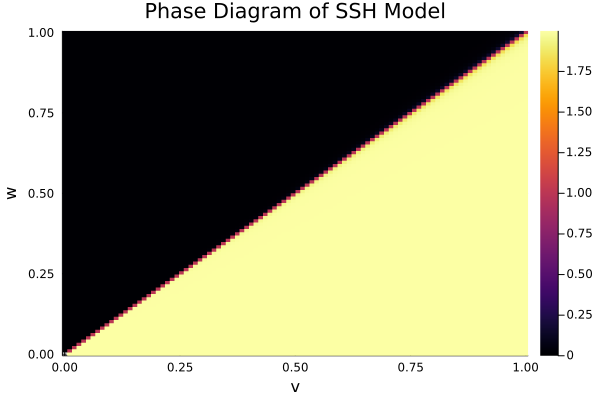

In [29]:
heatmap(vaa[:,1],waa[1,:],real.(ϕaa)) 
plot!(xlabel="v",ylabel="w", title="Phase Diagram of SSH Model")

#### Topological phase: v < w , Trivial phase: v>w